## 1. The load of packages, modules, and data

In [2]:
import sys
from aqua import Reader
sys.path.insert(0, '../../')
from tropical_rainfall import Tropical_Rainfall

In [3]:
from aqua.slurm import slurm

In [ ]:
slurm.job()

In [6]:
slurm.squeue()

JOBID      CPUS  NODES ST         NAME                 TIME       START_TIME           DEPENDENCY           PARTITION            MIN_MEMORY          
4828212    1     1     PD         dask-worker          0:00       N/A                  (null)               small                10G                 


0

In [7]:
slurm.scancel(Job_ID=6564703)

In [ ]:
diag = Tropical_Rainfall(trop_lat=15,  num_of_bins = 5000, first_edge = 0, loglevel='warning')

In [7]:
reader      = Reader(model="IFS", exp="control-1950-devcon",  source="hourly-native", regrid="r010")
ifs_control = reader.retrieve(var="tprate", regrid=True, startdate='19500101', enddate='19500102')

2023-10-20 18:25:42 :: Reader :: WARNING  -> Weights file not found: /pfs/lustrep3/projappl/project_465000454/data/AQUA/weights/weights_tco1279_ycon_r010_l2d.nc
2023-10-20 18:25:42 :: Reader :: WARNING  -> Attempting to generate it ...
/LUMI_TYKKY_PuGxLUy/miniconda/envs/env1/lib/python3.11/site-packages/distributed/client.py:3163: UserWarning: Sending large graph of size 435.12 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(


In [ ]:
if diag.tools.get_machine()==lumi:
    reader      = Reader(model="IFS", exp="control-1950-devcon",  source="hourly-native", regrid="r010")
    ifs_control = reader.retrieve(var="tprate", regrid=True, startdate='19500101', enddate='19500201') 
    
    reader      = Reader(model="IFS", exp="tco1279-orca025-cycle3", source="2D_1h_native", regrid="r010")
    ifs_tco1279_orca025= reader.retrieve(var="tprate", regrid=True, startdate='19500101', enddate='19500201')
    #ifs_tco1279_orca025_3h = reader.timmean(ifs_tco1279_orca025, freq="3H")

    #ifs_tco1279_orca025_3h  = ifs_tco1279_orca025_retrived.isel(time=slice(0, 24*ndays, freq))
    ifs_tco1279_orca025  = ifs_tco1279_orca025_retrived.sel(time=slice('2020-01-20', '2020-02-20'))
    ifs_tco1279_orca025_3h = reader.timmean(ifs_tco1279_orca025, freq="3H")
    ifs_tco1279_orca025_3h = reader.regrid(ifs_tco1279_orca025_3h)

    reader                      = Reader(model="IFS", exp="tco2559-ng5-cycle3", source="2D_1h_native",  regrid="r010")
    data_ifs_tco2559_ng5_ret    = reader.retrieve()
    data_ifs_tco2559_ng5_ret  = data_ifs_tco2559_ng5_ret.sel(time=slice('2020-01-20', '2020-02-20'))
    data_ifs_tco2559_ng5_3h = reader.timmean(data_ifs_tco2559_ng5_ret, freq="3H")
    #data_ifs_tco2559_ng5_ret_1week = data_ifs_tco2559_ng5_ret.isel(time=slice(0, 24*ndays, freq))
    data_ifs_tco2559_ng5_3h = reader.regrid(data_ifs_tco2559_ng5_3h)

In [ ]:
diag.add_UTC_DataAaray(data = data_ifs_tco2559_ng5_ret_1week, space_grid_factor = 0.5,
                        path_to_netcdf=path_to_netcdf, name_of_file = 'high_res_ifs_tco2559_ng5')

### tco2559-ng5-cycle3

In [14]:
reader                      = Reader(model="IFS", exp="tco2559-ng5-cycle3", source="2D_1h_native",  regrid="r010")
data_ifs_tco2559_ng5_ret    = reader.retrieve()
data_ifs_tco2559_ng5_ret  = data_ifs_tco2559_ng5_ret.sel(time=slice('2020-01-20', '2020-02-20'))
data_ifs_tco2559_ng5_3h = reader.timmean(data_ifs_tco2559_ng5_ret, freq="3H")
#data_ifs_tco2559_ng5_ret_1week = data_ifs_tco2559_ng5_ret.isel(time=slice(0, 24*ndays, freq))
data_ifs_tco2559_ng5_3h = reader.regrid(data_ifs_tco2559_ng5_3h)
#data_ifs_tco2559_ng5_ret_1week = data_ifs_tco2559_ng5_ret_1week['tprate'][:]*86400

2023-08-17 01:59:13 :: Reader :: WARNING  -> Duplicate entries found along the time axis, keeping the first one.


### ngc3028

In [5]:
reader = Reader(model="ICON", exp="ngc3028", source="PT3H", zoom=10,  regrid="r010")
data_icon3028_retrieved = reader.retrieve()
data_icon3028_retrieved = data_icon3028_retrieved['tprate']

In [ ]:
data_icon3028_retrieved  = data_icon3028_retrieved.sel(time=slice('2020-01-20', '2020-01-21'))
data_icon3028 = reader.regrid(data_icon3028_retrieved)

### mswep

In [ ]:
reader        = Reader(model="MSWEP", exp="past", source="3hourly")
mswep_no_fixer = reader.retrieve(fix=False)
mswep_no_fixer = mswep_no_fixer.rename({'precipitation': 'tprate'})

In [ ]:
#diag.add_UTC_DataAaray(data = icon_ngc3028,  space_grid_factor = 1, time_length=60)

In [15]:
ifs_tco1279_orca025.lat.size*0.005, ifs_tco1279_orca025.lon.size*0.005

(9.0, 18.0)

In [18]:
diag.add_UTC_DataAaray(data = data_ifs_tco2559_ng5_ret_1week, space_grid_factor = 0.5,
                        path_to_netcdf=path_to_netcdf, name_of_file = 'high_res_ifs_tco2559_ng5')

2023-08-17 02:01:06 :: Trop. Rainfall :: DEBUG    -> Latitude selected and mean calculated


In [9]:
_path = "/work/bb1153/b382267/tropical_rainfall_cicle3/NetCDF/UTC_timing/"
filename = "trop_rainfall_3h_10km_mswep_2000-01-01T00_2000-02-29T21_histogram.nc"#
temp = diag.open_dataset(_path+filename)

In [14]:
reader        = Reader(model="MSWEP", exp="past", source="3hourly")
mswep_no_fixer = reader.retrieve()
#mswep_no_fixer = mswep_no_fixer.rename({'precipitation': 'tprate'})
#mswep  = mswep_no_fixer.sel(time=slice('2000-01', '2000-02'))

[<Figure size 880x800 with 1 Axes>,
 <Axes: title={'center': 'Relative Value of Daily Precipitation Variability'}, xlabel='Local time'>]

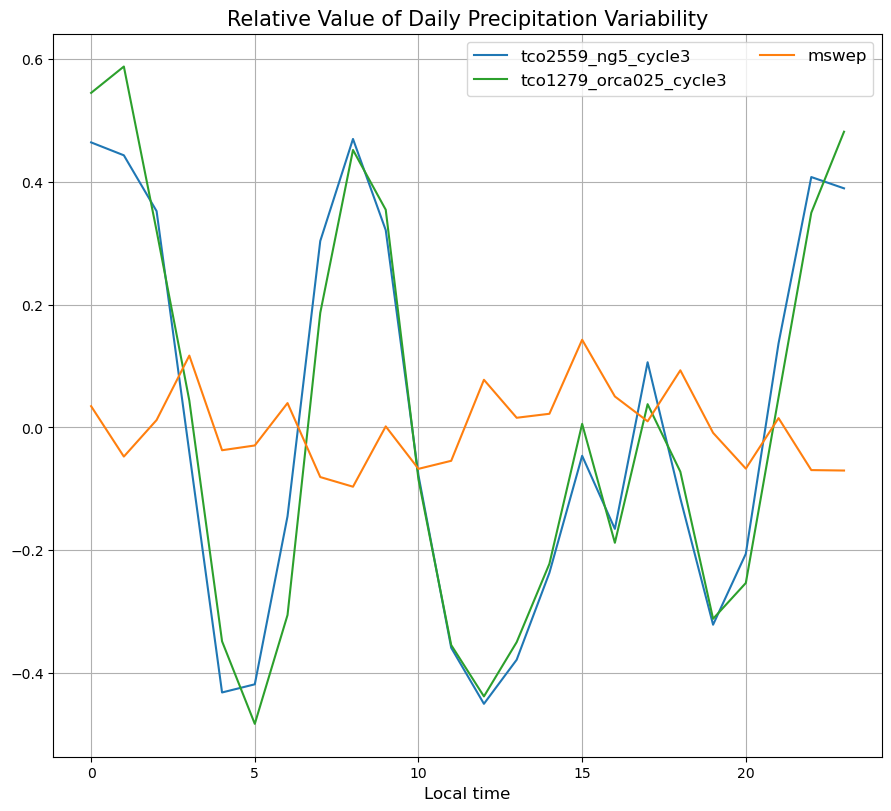

In [6]:
_path = "/work/bb1153/b382267/tropical_rainfall_cicle3/NetCDF/UTC_timing/"

filename =  "trop_rainfall_3h_10km_tco2559_ng5_cycle3___GLOB_2020-01-20T00_2020-02-29T00_histogram.nc"
add = diag.daily_variability_plot(path_to_netcdf = _path + filename, legend = 'tco2559_ng5_cycle3', 
                                  figsize=0.8, new_unit='mm/day')
filename = "trop_rainfall_3h_10km_tco1279_orca025_cycle3_GLOB_2020-01-20T00_2020-02-29T00_histogram.nc"
add = diag.daily_variability_plot(path_to_netcdf=_path+filename, legend = 'tco1279_orca025_cycle3', 
                                  add=add, new_unit='mm/day', color='tab:green')
filename = "trop_rainfall_3h_10km_mswep_GLOB_2000-01-01T00_2000-02-29T21_histogram.nc"
diag.daily_variability_plot(path_to_netcdf=_path+filename, legend = 'mswep', 
                            add=add, new_unit='mm/day', color='tab:orange')

[<Figure size 880x800 with 1 Axes>,
 <Axes: title={'center': 'Relative Value of Daily Precipitation Variability'}, xlabel='Local time'>]

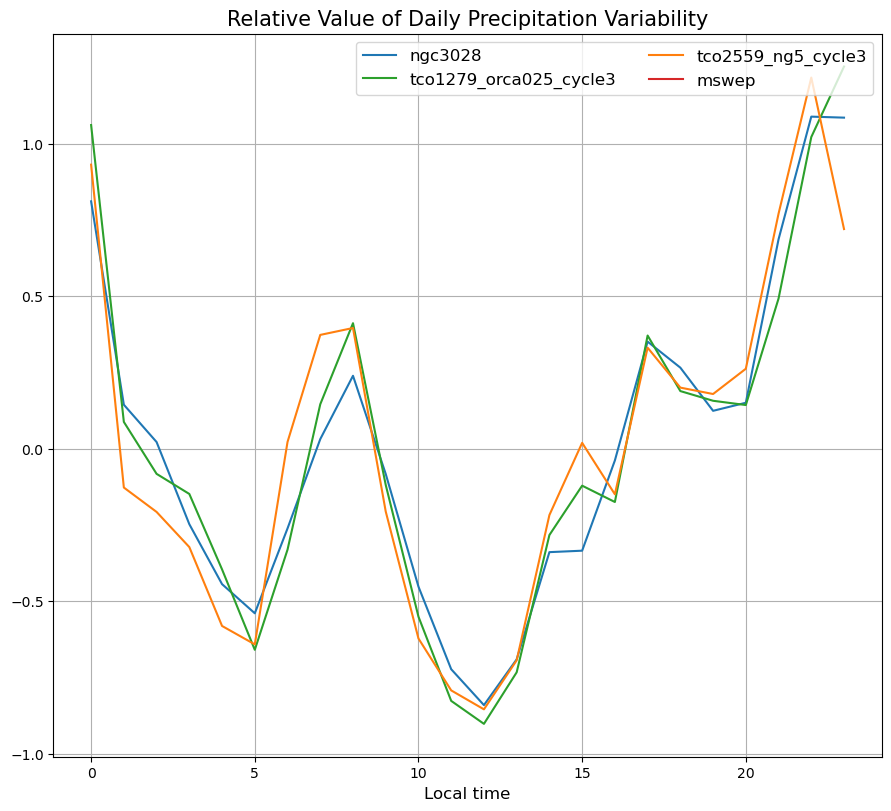

In [7]:
_path = "/work/bb1153/b382267/tropical_rainfall_cicle3/NetCDF/UTC_timing/"

filename =  "trop_rainfall_3h_10km_ngc3028_2020-01-20T00_2020-02-29T00_histogram.nc"
add = diag.daily_variability_plot(path_to_netcdf = _path + filename, legend = 'ngc3028', 
                                  figsize=0.8, new_unit='mm/day')
filename = "trop_rainfall_3h_10km_tco1279_orca025_cycle3_2020-01-20T00_2020-02-29T00_histogram.nc"
add = diag.daily_variability_plot(path_to_netcdf=_path+filename, legend = 'tco1279_orca025_cycle3', 
                                  add=add, new_unit='mm/day', color='tab:green')
filename = "trop_rainfall_3h_10km_tco2559_ng5_cycle3___2020-01-20T00_2020-02-29T00_histogram.nc"
diag.daily_variability_plot(path_to_netcdf=_path+filename, legend = 'tco2559_ng5_cycle3', 
                            add=add, new_unit='mm/day', color='tab:orange')
filename = "trop_rainfall_3h_10km_mswep_2000-01-01T00_2000-02-29T21_histogram.nc"
diag.daily_variability_plot(path_to_netcdf=_path+filename, legend = 'mswep', 
                            add=add, new_unit='mm/day', color='tab:red')

                            